[u'bins', u'data']
(20, 8, 512, 1024)
Print bins array:
[76084. 75140. 74221. 74032. 74244. 74272. 73944. 74207. 73639. 73294.
 73753. 73667. 73565. 73289. 73649. 72963. 73244. 72966. 72715. 71915.]
total number of shots = 1474803 
(20,)
float64
(20, 8, 512, 1024)
avg xint = 0.629333
length:  8
mean:    0.792954
median:  0.309973
minimum: 0.000000
maximum: 101.423305
st. dev: 1.831526
length:  8
mean:    0.794043
median:  0.312092
minimum: 0.000000
maximum: 26.002352
st. dev: 1.821162
max q value = 4.380191
Averaging over 101 bins...


Text(0,0.5,'I(q)')

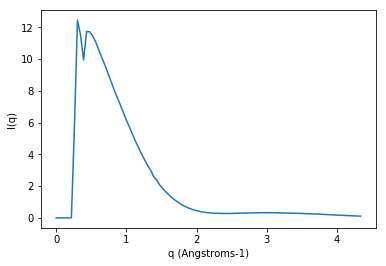

In [2]:
import numpy as np
import h5py
from psana import *
import matplotlib.pyplot as plt
from myfunctions import radial_avg,stats
from global_vars import *
#plt.switch_backend('agg')

### 5/5/22 (Day 4) TN
### Learning manipulation of h5 file data from SLAC (Nate)

"""
### From h5py:
An HDF5 file is a container for two kinds of objects: datasets, which are array-like collections of data, and groups, which are folder-like containers that hold datasets and other groups. The most fundamental thing to remember when using h5py is:

    Groups work like dictionaries, and datasets work like NumPy arrays

"""

# mask out bad pixels
mask = np.load('/reg/d/psdm/cxi/cxilv0418/results/Masks/Mask_Jungfrau_28_29_T_Edge.npy')

# load h5 file
fname = 'combined_runs_xint_binning.h5'
f = h5py.File(fname, 'r')

# print database keys
print(f.keys())

bins = f['bins']
dset = f['data']
print(dset.shape)

# The object we obtained isn’t an array, but an HDF5 dataset. Like NumPy arrays, datasets have both a shape and a data type:
#print(dset.shape)
#print(dset.dtype)
print('Print bins array:')
print(bins[:])
print('total number of shots = %d ' % np.sum(bins))
print(bins.shape)
print(bins.dtype)

# print some elements of the array
# print(dset[0])
# print(dset[:])
# ok...

#dset = np.transpose(dset, (1,2,3,0) )
print(dset.shape)

print('avg xint = %f' % np.average(dset))

experiment = 'cxilv0418'
run = 43
ds = DataSource('exp=%s:run=%d'% (experiment, run))
evt0 = ds.events().next()
det = Detector('DetInfo(CxiDs1.0:Jungfrau.0)', ds.env())
# Bin statistics plot

scale = 1e5  # arbitrarily scale values for plotting
low_data=np.zeros((8,512,1024))
high_data=low_data

r = range(0,10)
low_data = scale*mask*np.sum(dset[r,:,:,:],axis=0)/np.sum(bins[r])
stats(low_data)

r = range(10,20)
high_data = scale*mask*np.sum(dset[r,:,:,:],axis=0)/np.sum(bins[r])
stats(high_data)
    
plots=False
if plots:
 img0 = det.image(evt0, low_data)
 plt.figure()
 plt.imshow(img0, cmap='jet')
 plt.clim(0, 0.0001*scale)
 plt.colorbar()
 plt.title('')
 plt.show()
 
 img1 = det.image(evt0, high_data)
 plt.figure()
 plt.imshow(img1, cmap='jet')
 plt.clim(0, 0.0001*scale)
 plt.colorbar()
 plt.title('')
 plt.show()
 
 plt.figure()
 plt.imshow(100*(img1-img0)/img0, cmap='jet')
 #plt.clim(0, 5)
 plt.clim(-2, 5)
 plt.colorbar()
 plt.title('X-ray intensity bin comparison 100(High-Low)/Low')
 plt.show()
 
#Defining q and phi
x0, y0, Z, phi0 = 1.25458071e+03, 4.67530896e+02, 8.20468586e+04, 0 ##8.20468...
X = det.coords_x(evt0)
Y = det.coords_y(evt0)
distance = Z*1e-6
wavelength = 0.13051e-9
rr = np.sqrt((X+x0)**2 + (Y+y0)**2)*1e-6
theta = np.arctan2(rr, distance) / 2.0
q = 4*np.pi*np.sin(theta) / wavelength*1e-10
print('max q value = %f' % np.max(q))
#phi = np.arctan2(Y+y0,X+x0) + np.pi

nbins = 101
q_rad,I_rad_high = radial_avg(q,high_data,nbins)

#print(I_rad)
plt.plot(q_rad,I_rad_high)
plt.xlabel('q (Angstroms-1)')
plt.ylabel('I(q)')
#plt.title('')
#plt.xlim(0.8,1.2)